<a href="https://colab.research.google.com/github/andyradz/aplios.solutions/blob/master/introduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AR-DiplomaWorkspace

#### MOUNT GOOGLE DRIVE VOLUME

In [1]:
## MOUNT GOOGLE DRIVE VOLUME

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### LIST GOOGLE DRIVE VOLUME

In [2]:
## LIST GOOGLE DRIVE VOLUME
!ls -laFtA --full-time /content/gdrive 

### CREATE REQUIRED DATA FOLDERS

!mkdir input
!mkdir output

total 16
dr-x------  2 root root 4096 2022-12-05 21:48:09.000000000 +0000 .file-revisions-by-id/
drwx------ 22 root root 4096 2022-12-05 21:48:09.000000000 +0000 MyDrive/
dr-x------  2 root root 4096 2022-12-05 21:48:09.000000000 +0000 .shortcut-targets-by-id/
drwx------  5 root root 4096 2022-12-05 21:48:09.000000000 +0000 .Trash-0/


In [3]:
### DOWNLOAD AND INSTALL JAVA VIRTUAL MACHINE(JVM)

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:
### DOWNLOAD APACHE SPARK AND HADOOP ENVIRONMENT
!wget https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz > /dev/null

### UNZIP SPARK ENVIRONMENT
!tar xf spark-3.3.1-bin-hadoop3.tgz > /dev/null

--2022-12-05 21:48:28--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.1-bin-hadoop3.tgz’

spark-3.3.1-bin-had 100%[===================>] 285.48M   201MB/s    in 1.4s    

2022-12-05 21:48:30 (201 MB/s) - ‘spark-3.3.1-bin-hadoop3.tgz’ saved [299350810/299350810]



In [5]:
### SET SYSTEM VARIABLES FOR PYSPARK

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.1-bin-hadoop3'
os.environ['PYSPARK_SUBMIT_ARGS'] = '---jars /content/spark-3.3.1-bin-hadoop3/jars/spark-xml_2.12-0.11.0.jar pyspark-shell'

In [6]:
### INSTALL PYSPARK ENVIRONMENT
!pip install -q pyspark > /dev/null

### INSTALL LIBRARY FIND PYSPARK
!pip install -q findspark > /dev/null

### INITIAL PYSPARK ENVIRONMENT
import findspark
findspark.init()

### CHECK PYSPARK LOCATION
findspark.find()


'/content/spark-3.3.1-bin-hadoop3'

In [7]:
!sudo apt install --assume-yes p7zip-full

!type(7z)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/bin/bash: -c: line 0: syntax error near unexpected token `7z'
/bin/bash: -c: line 0: `type(7z)'


In [8]:
### LIST PYTHON INSTALLED PACKAGES

!pip3 list -v


Package                       Version                Location                               Installer
----------------------------- ---------------------- -------------------------------------- ---------
absl-py                       1.3.0                  /usr/local/lib/python3.8/dist-packages pip
aeppl                         0.0.33                 /usr/local/lib/python3.8/dist-packages pip
aesara                        2.7.9                  /usr/local/lib/python3.8/dist-packages pip
aiohttp                       3.8.3                  /usr/local/lib/python3.8/dist-packages pip
aiosignal                     1.3.1                  /usr/local/lib/python3.8/dist-packages pip
alabaster                     0.7.12                 /usr/local/lib/python3.8/dist-packages pip
albumentations                1.2.1                  /usr/local/lib/python3.8/dist-packages pip
altair                        4.2.0                  /usr/local/lib/python3.8/dist-packages pip
appdirs                     

# Download stackexchange data 

In [9]:
#!FILE=/content/input/books.xml
#!if ![-f "$FILE"]; then
#!    echo Start downloading file $FILE
#!    wget https://github.com/databricks/spark-xml/raw/master/src/test/resources/books.xml  -P /content/input/ > /dev/null
#!fi


!wget https://archive.org/download/stackexchange/mathematica.stackexchange.com.7z -P /content/input/ > /dev/null

!7za e -y /content/input/mathematica.stackexchange.com.7z -o/content/input/ > /dev/null

--2022-12-05 21:49:24--  https://archive.org/download/stackexchange/mathematica.stackexchange.com.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia800107.us.archive.org/27/items/stackexchange/mathematica.stackexchange.com.7z [following]
--2022-12-05 21:49:25--  https://ia800107.us.archive.org/27/items/stackexchange/mathematica.stackexchange.com.7z
Resolving ia800107.us.archive.org (ia800107.us.archive.org)... 207.241.232.17
Connecting to ia800107.us.archive.org (ia800107.us.archive.org)|207.241.232.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265738334 (253M) [application/x-7z-compressed]
Saving to: ‘/content/input/mathematica.stackexchange.com.7z’

mathematica.stackex 100%[===================>] 253.43M  3.21MB/s    in 54s     

2022-12-05 21:50:19 (4.68 MB/s) - ‘/content/input/mathematica.stackexchange.com

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, LongType, StringType, BooleanType, DateType 
from pyspark.sql.functions import to_timestamp, date_format, col

spark = SparkSession.builder.master("local[4]").appName('ARDiplomaWork').config('spark.jars.packages', 'com.databricks:spark-xml_2.12:0.6.0').getOrCreate()

#### LOAD AND SAVE POSTS.XML DATASET TO PARQUET FORMAT

In [2]:
schema = StructType([ \
    StructField("_AnswerCount", LongType(), True), \
    StructField("_Body", StringType(), True), \
    StructField("_CommentCount", LongType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_LastActivityDate", StringType(), True), \
    StructField("_OwnerUserId", LongType(), True), \
    StructField("_ParentId", LongType(), True), \
    StructField("_PostTypeId", LongType(), True), \
    StructField("_Score", LongType(), True), \
    StructField("_Tags", StringType(), True), \
    StructField("_Title", StringType(), True), \
    StructField("_ViewCount", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True) \
]) 

postsDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='posts') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Posts.xml')     

postsDF = postsDF \
                .withColumnRenamed("_AnswerCount", "AnswerCount") \
                .withColumnRenamed("_Body", "Body") \
                .withColumnRenamed("_CommentCount", "CommentCount") \
                .withColumnRenamed("_CreationDate", "CreationDate") \
                .withColumnRenamed("_Id", "Id") \
                .withColumnRenamed("_LastActivityDate", "LastActivityDate") \
                .withColumnRenamed("_OwnerUserId", "OwnerUserId") \
                .withColumnRenamed("_ParentId", "ParentId") \
                .withColumnRenamed("_PostTypeId", "PostTypeId") \
                .withColumnRenamed("_Score", "Score") \
                .withColumnRenamed("_Tags", "Tags") \
                .withColumnRenamed("_Title", "Title") \
                .withColumnRenamed("_ViewCount", "ViewCount")

postsDF = postsDF \
  .select(["Id", "ParentId", "PostTypeId", "OwnerUserId", \
          to_timestamp("CreationDate").alias("CreationDate"), "Score", \
          "ViewCount", "AnswerCount", \
          "CommentCount", to_timestamp("LastActivityDate").alias("LastActivityDate"), \
          "Tags", "Title", "Body"]) \
  .withColumn("Year", date_format(col("CreationDate"), "y").cast("integer")) \
  .withColumn("Month", date_format(col("CreationDate"), "M").cast("integer")) \
  .withColumn("Day", date_format(col("CreationDate"), "d").cast("integer")) \

postsDF.printSchema()   
postsDF.show(n=10, truncate=False)

postsDF = postsDF \
      .write \
      .partitionBy("Year", "Month", "Day") \
      .mode("overwrite") \
      .parquet("/content/output/posts.parquet")      

root
 |-- Id: long (nullable = true)
 |-- ParentId: long (nullable = true)
 |-- PostTypeId: long (nullable = true)
 |-- OwnerUserId: long (nullable = true)
 |-- CreationDate: timestamp (nullable = true)
 |-- Score: long (nullable = true)
 |-- ViewCount: long (nullable = true)
 |-- AnswerCount: long (nullable = true)
 |-- CommentCount: long (nullable = true)
 |-- LastActivityDate: timestamp (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Body: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+--------+----------+-----------+-----------------------+-----+---------+-----------+------------+-----------------------+---------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------+---------------------------------------------

#### LOAD AND SAVE BADGES.XML DATASET TO PARQUET FORMAT

In [3]:
schema = StructType([ \
    StructField("_Class", LongType(), True), \
    StructField("_Date", StringType(), True), \
    StructField("_CommentCount", LongType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_Name", StringType(), True), \
    StructField("_TagBased", BooleanType(), True), \
    StructField("_UserId", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)
])

badgesDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='badges') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Badges.xml')

badgesDF = badgesDF \
                .withColumnRenamed("_Class", "Class") \
                .withColumnRenamed("_Date", "Date") \
                .withColumnRenamed("_CommentCount", "CommentCount") \
                .withColumnRenamed("_Id", "Id") \
                .withColumnRenamed("_Name", "Name") \
                .withColumnRenamed("_TagBased", "TagBased") \
                .withColumnRenamed("_UserId", "UserId")

badgesDF = badgesDF \
              .select(["Id", "UserId", "Class", "Date", "CommentCount", \
                      "TagBased","Name"]) \
              .withColumn("Year", date_format(col("Date"), "y").cast("integer")) \
              .withColumn("Month", date_format(col("Date"), "M").cast("integer")) \
              .withColumn("Day", date_format(col("Date"), "d").cast("integer"))

badgesDF.printSchema()
badgesDF.show(n=10, truncate=False)

badgesDF \
      .write \
      .partitionBy("Year", "Month", "Day") \
      .mode("overwrite") \
      .parquet("/content/output/badges.parquet")

root
 |-- Id: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- Class: long (nullable = true)
 |-- Date: string (nullable = true)
 |-- CommentCount: long (nullable = true)
 |-- TagBased: boolean (nullable = true)
 |-- Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+------+-----+-----------------------+------------+--------+--------------+----+-----+---+
|Id |UserId|Class|Date                   |CommentCount|TagBased|Name          |Year|Month|Day|
+---+------+-----+-----------------------+------------+--------+--------------+----+-----+---+
|1  |1     |3    |2012-01-17T20:56:42.617|null        |false   |Autobiographer|2012|1    |17 |
|2  |2     |3    |2012-01-17T20:56:42.617|null        |false   |Autobiographer|2012|1    |17 |
|3  |3     |3    |2012-01-17T20:56:42.617|null        |false   |Autobiographer|2012|1    |17 |
|4  |8     |3    |2012-01-17T21:01:42.390|null        |

#### LOAD AND SAVE COMMENTS.XML DATASET TO PARQUET FORMAT

In [4]:
schema = StructType([ \
    StructField("_ContentLicense", StringType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_PostId", LongType(), True), \
    StructField("_Score", LongType(), True), \
    StructField("_Text", StringType(), True), \
    StructField("_UserDisplayName", StringType(), True), \
    StructField("_UserId", LongType(), True),
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)        
])

commentsDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='comments') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Comments.xml')

commentsDF = commentsDF \
                .withColumnRenamed("_ContentLicense", "ContentLicense") \
                .withColumnRenamed("_CreationDate", "CreationDate") \
                .withColumnRenamed("_Id", "Id") \
                .withColumnRenamed("_PostId", "PostId") \
                .withColumnRenamed("_Score", "Score") \
                .withColumnRenamed("_Text", "Text") \
                .withColumnRenamed("_UserDisplayName", "UserDisplayName") \
                .withColumnRenamed("_UserId", "UserId") \

commentsDF = commentsDF \
  .select(["Id", "PostId", "UserId", "CreationDate", "ContentLicense", \
           "UserDisplayName", "Score", "Text"]) \
           .withColumn("Year", date_format(col("CreationDate"), "y").cast("integer")) \
           .withColumn("Month", date_format(col("CreationDate"), "M").cast("integer")) \
           .withColumn("Day", date_format(col("CreationDate"), "d").cast("integer"))

commentsDF.printSchema()
commentsDF.show(n=10, truncate=False)

commentsDF \
    .write \
    .partitionBy("Year", "Month", "Day") \
    .mode("overwrite") \
    .parquet("/content/output/comments.parquet")

root
 |-- Id: long (nullable = true)
 |-- PostId: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- CreationDate: string (nullable = true)
 |-- ContentLicense: string (nullable = true)
 |-- UserDisplayName: string (nullable = true)
 |-- Score: long (nullable = true)
 |-- Text: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+------+------+-----------------------+--------------+---------------+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+-----+---+
|Id |PostId|UserId|CreationDate           |ContentLicense|UserDisplayName|Score|Text                                                                                           

#### LOAD AND SAVE POSTHISTORY.XML DATASET TO PARQUET FORMAT

In [5]:
schema = StructType([ \
    StructField("_Comment", StringType(), True), \
    StructField("_ContentLicense", StringType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_PostHistoryTypeId", LongType(), True), \
    StructField("_PostId", LongType(), True), \
    StructField("_RevisionGUID", StringType(), True), \
    StructField("_Text", StringType(), True), \
    StructField("_UserDisplayName", StringType(), True), \
    StructField("_UserId", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)    
])

postHistoryDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='posthistory') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/PostHistory.xml')
               
postHistoryDF = postHistoryDF \
              .withColumnRenamed("_Comment", "Comment") \
              .withColumnRenamed("_ContentLicense", "ContentLicense") \
              .withColumnRenamed("_CreationDate", "CreationDate") \
              .withColumnRenamed("_Id", "Id") \
              .withColumnRenamed("_PostHistoryTypeId", "PostHistoryTypeId") \
              .withColumnRenamed("_PostId", "PostId") \
              .withColumnRenamed("_RevisionGUID", "RevisionGUID") \
              .withColumnRenamed("_Text", "Text") \
              .withColumnRenamed("_UserDisplayName", "UserDisplayName") \
              .withColumnRenamed("_UserId", "UserId") \

postHistoryDF = postHistoryDF \
              .select(["Id", "PostId", "PostHistoryTypeId", "UserId", \
                       "CreationDate", "RevisionGUID", "ContentLicense", "UserDisplayName", "Comment", "Text"]) \
              .withColumn("Year", date_format(col("CreationDate"), "y").cast("integer")) \
              .withColumn("Month", date_format(col("CreationDate"), "M").cast("integer")) \
              .withColumn("Day", date_format(col("CreationDate"), "d").cast("integer"))                       

postHistoryDF.printSchema()
postHistoryDF.show(n=10, truncate=False)  

postHistoryDF \
  .write \
  .partitionBy("Year", "Month", "Day") \
  .mode("overwrite") \
  .parquet("/content/output/posthistory.parquet")  

root
 |-- Id: long (nullable = true)
 |-- PostId: long (nullable = true)
 |-- PostHistoryTypeId: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- CreationDate: string (nullable = true)
 |-- RevisionGUID: string (nullable = true)
 |-- ContentLicense: string (nullable = true)
 |-- UserDisplayName: string (nullable = true)
 |-- Comment: string (nullable = true)
 |-- Text: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)

+---+------+-----------------+------+-----------------------+------------------------------------+--------------+---------------+-------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### LOAD AND SAVE TAGS.XML DATASET TO PARQUET FORMAT

In [6]:
schema = StructType([ \
    StructField("_Count", LongType(), True), \
    StructField("_ExcerptPostId", LongType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_TagName", StringType(), True), \
    StructField("_WikiPostId", LongType(), True)    
])

tagsDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='tags') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Tags.xml')

tagsDF = tagsDF \
        .withColumnRenamed("_Count", "Count") \
        .withColumnRenamed("_ExcerptPostId", "ExcerptPostId") \
        .withColumnRenamed("_Id", "Id") \
        .withColumnRenamed("_TagName", "TagName") \
        .withColumnRenamed("_WikiPostId", "WikiPostId")

tagsDF = tagsDF \
        .select(["Id", "ExcerptPostId", "WikiPostId", "Count", "TagName"])

tagsDF.printSchema()
tagsDF.show(n=10, truncate=False)

tagsDF \
  .write \
  .partitionBy("Id") \
  .mode("overwrite") \
  .parquet("/content/output/tags.parquet") 

root
 |-- Id: long (nullable = true)
 |-- ExcerptPostId: long (nullable = true)
 |-- WikiPostId: long (nullable = true)
 |-- Count: long (nullable = true)
 |-- TagName: string (nullable = true)

+---+-------------+----------+-----+-----------------+
|Id |ExcerptPostId|WikiPostId|Count|TagName          |
+---+-------------+----------+-----+-----------------+
|1  |178          |177       |1795 |front-end        |
|3  |1689         |1688      |1371 |pattern-matching |
|4  |94           |93        |209  |cdf-format       |
|5  |null         |null      |35   |topology         |
|6  |143          |142       |4367 |graphics         |
|7  |111          |110       |14407|plotting         |
|9  |439          |438       |3219 |matrix           |
|10 |413          |412       |1433 |symbolic         |
|11 |89795        |89794     |184  |inverse          |
|13 |67           |66        |131  |reference-request|
+---+-------------+----------+-----+-----------------+
only showing top 10 rows



#### LOAD AND SAVE USERS.XML DATASET TO PARQUET FORMAT

In [7]:
from pyspark.sql.functions import *

schema = StructType([ \
    StructField("_AboutMe", StringType(), True), \
    StructField("_AccountId", LongType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_DisplayName", StringType(), True), \
    StructField("_DownVotes", LongType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_LastAccessDate", StringType(), True), \
    StructField("_Location", StringType(), True), \
    StructField("_ProfileImageUrl", StringType(), True), \
    StructField("_Reputation", LongType(), True), \
    StructField("_UpVotes", LongType(), True), \
    StructField("_Views", LongType(), True), \
    StructField("_WebsiteUrl", StringType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)
])

usersDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='Users') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Users.xml')

usersDF = usersDF \
  .withColumnRenamed("_AboutMe", "AboutMe") \
  .withColumnRenamed("_AccountId", "AccountId") \
  .withColumnRenamed("_CreationDate", "CreationDate") \
  .withColumnRenamed("_DisplayName", "DisplayName") \
  .withColumnRenamed("_DownVotes", "DownVotes") \
  .withColumnRenamed("_Id", "Id") \
  .withColumnRenamed("_LastAccessDate", "LastAccessDate") \
  .withColumnRenamed("_Location", "Location") \
  .withColumnRenamed("_ProfileImageUrl", "ProfileImageUrl") \
  .withColumnRenamed("_Reputation", "Reputation") \
  .withColumnRenamed("_UpVotes", "UpVotes") \
  .withColumnRenamed("_Views", "Views") \
  .withColumnRenamed("_WebsiteUrl", "WebsiteUrl") \

usersDF = usersDF \
  .select(["Id", "AccountId", to_timestamp("CreationDate").alias("CreationDate"), \
           to_timestamp("LastAccessDate").alias("LastAccessDate"), "DownVotes", \
           "UpVotes", "Reputation", "Views", "WebsiteUrl", "ProfileImageUrl", \
           "Location", "DisplayName", "AboutMe"           
           ]) \
  .withColumn("Year", date_format(col("CreationDate"), "y")) \
  .withColumn("Month", date_format(col("CreationDate"), "M")) \
  .withColumn("Day", date_format(col("CreationDate"), "d"))

usersDF.printSchema()
usersDF.show(n=10, truncate=False) 

usersDF \
  .write \
  .partitionBy("Year", "Month", "Day") \
  .mode("overwrite") \
  .parquet("/content/output/users.parquet")

root
 |-- Id: long (nullable = true)
 |-- AccountId: long (nullable = true)
 |-- CreationDate: timestamp (nullable = true)
 |-- LastAccessDate: timestamp (nullable = true)
 |-- DownVotes: long (nullable = true)
 |-- UpVotes: long (nullable = true)
 |-- Reputation: long (nullable = true)
 |-- Views: long (nullable = true)
 |-- WebsiteUrl: string (nullable = true)
 |-- ProfileImageUrl: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- DisplayName: string (nullable = true)
 |-- AboutMe: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)

+---+---------+-----------------------+-----------------------+---------+-------+----------+-----+------------------------------+-------------------------------------------------------------------------------------------+-------------------+----------------+---------------------------------------------------------------------------------------------------

#### LOAD AND SAVE VOTES.XML DATASET TO PARQUET FORMAT

In [8]:
schema = StructType([ \
    StructField("_BountyAmount", LongType(), True), \
    StructField("_CreationDate", StringType(), True), \
    StructField("_Id", LongType(), True), \
    StructField("_PostId", LongType(), True), \
    StructField("_UserId", LongType(), True), \
    StructField("_VoteTypeId", LongType(), True), \
    StructField("Year", LongType(), True), \
    StructField("Month", LongType(), True), \
    StructField("Day", LongType(), True)
])

votesDF = spark.read \
          .format('com.databricks.spark.xml') \
          .options(rootTag='votes') \
          .options(rowTag='row') \
          .schema(schema) \
          .load('/content/input/Votes.xml')

votesDF = votesDF \
  .withColumnRenamed("_BountyAmount", "BountyAmount") \
  .withColumnRenamed("_CreationDate", "CreationDate") \
  .withColumnRenamed("_Id", "Id") \
  .withColumnRenamed("_PostId", "PostId") \
  .withColumnRenamed("_UserId", "UserId") \
  .withColumnRenamed("_VoteTypeId", "VoteTypeId") \

votesDF = votesDF \
  .select(["Id", "PostId", "UserId", "VoteTypeId", \
          to_timestamp("CreationDate").alias("CreationDate"), "BountyAmount"]) \
  .withColumn("Year", date_format(col("CreationDate"), "y")) \
  .withColumn("Month", date_format(col("CreationDate"), "M")) \
  .withColumn("Day", date_format(col("CreationDate"), "d"))  

votesDF.printSchema()
votesDF.show(n=10, truncate=False) 

votesDF \
  .write \
  .partitionBy("Year", "Month", "Day") \
  .mode("overwrite") \
  .parquet("/content/output/votes.parquet")

root
 |-- Id: long (nullable = true)
 |-- PostId: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- VoteTypeId: long (nullable = true)
 |-- CreationDate: timestamp (nullable = true)
 |-- BountyAmount: long (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)

+---+------+------+----------+-------------------+------------+----+-----+---+
|Id |PostId|UserId|VoteTypeId|CreationDate       |BountyAmount|Year|Month|Day|
+---+------+------+----------+-------------------+------------+----+-----+---+
|1  |1     |null  |2         |2012-01-17 00:00:00|null        |2012|1    |17 |
|2  |1     |null  |2         |2012-01-17 00:00:00|null        |2012|1    |17 |
|3  |1     |null  |2         |2012-01-17 00:00:00|null        |2012|1    |17 |
|4  |1     |null  |2         |2012-01-17 00:00:00|null        |2012|1    |17 |
|5  |1     |null  |2         |2012-01-17 00:00:00|null        |2012|1    |17 |
|6  |2     |null  |2 

Year   2010  2011    2012    2013    2014    2015    2016    2017    2018  \
Month                                                                       
1       NaN   6.0  1005.0  1425.0  1437.0  1690.0  1828.0  1760.0  1750.0   
2       NaN   1.0  1244.0  1381.0  1210.0  1786.0  1939.0  1844.0  1653.0   
3       NaN  10.0  1178.0  1641.0  1445.0  2183.0  2369.0  2191.0  1930.0   
4       NaN   6.0  1019.0  1643.0  1392.0  2073.0  1994.0  1980.0  1810.0   
5       NaN   5.0  1203.0  1515.0  1341.0  2089.0  1907.0  1986.0  1769.0   
6       NaN   5.0  1305.0  1362.0  1536.0  1958.0  1998.0  1758.0  1728.0   
7       NaN  16.0  1058.0  1337.0  2016.0  2027.0  1739.0  1992.0  1676.0   
8       NaN   8.0  1006.0  1492.0  1776.0  1754.0  2077.0  1785.0  1510.0   
9       NaN   3.0  1040.0  1478.0  1929.0  1757.0  2026.0  1778.0  1644.0   
10      NaN   9.0  1413.0  1537.0  2024.0  2108.0  1955.0  1788.0  1867.0   
11      NaN  13.0  1334.0  1489.0  1903.0  2125.0  1925.0  1770.0  1723.0   

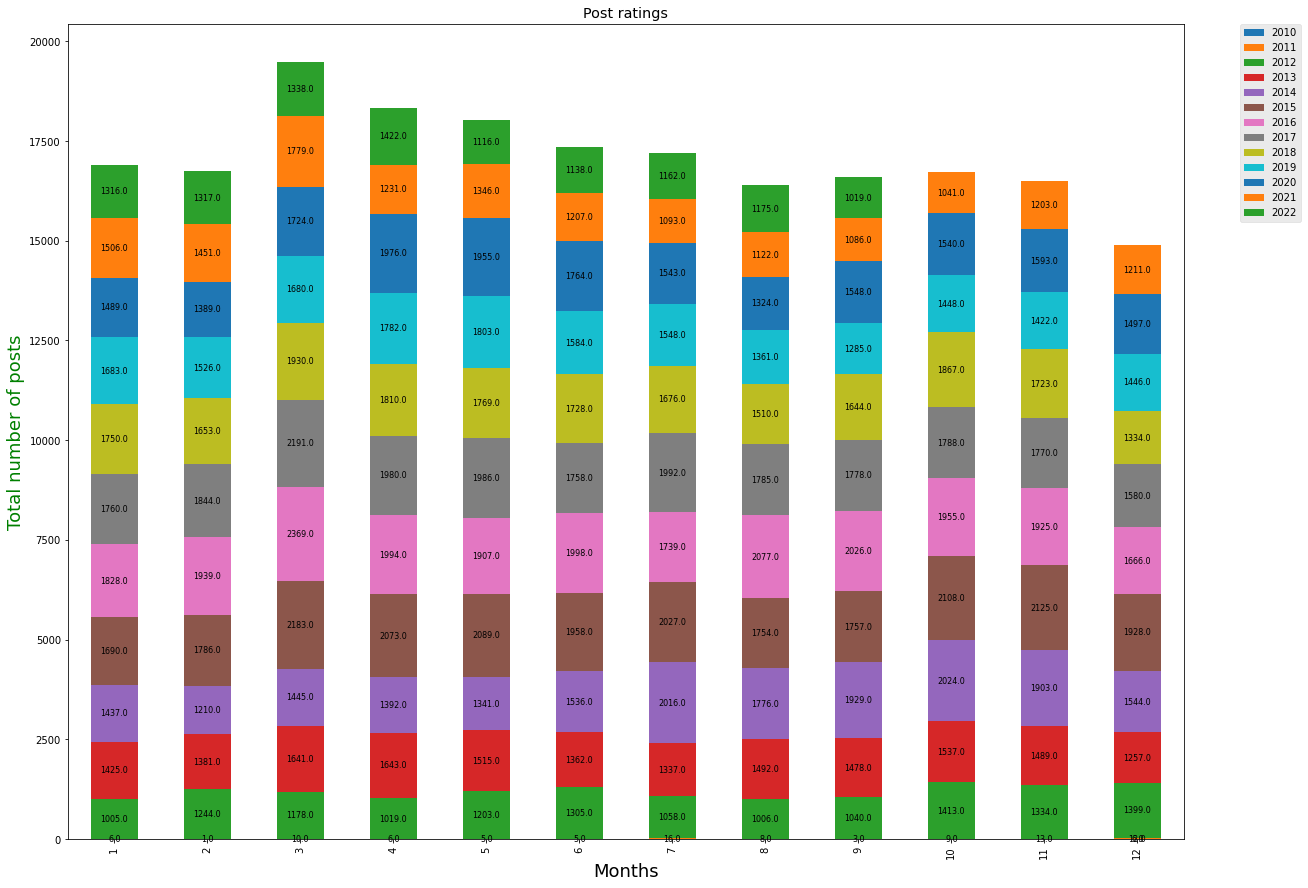

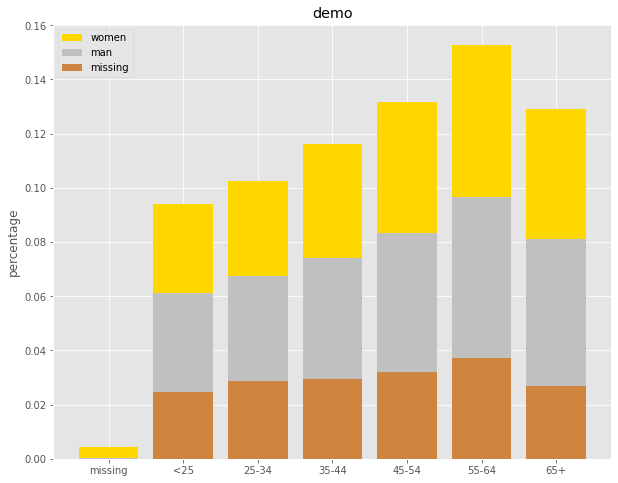

In [9]:
### ANALITYKA POSTS

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = [10, 6]

postsDF1 = spark.read.parquet("/content/output/posts.parquet")

y=[2022, 20221]

postsDF1 = postsDF1 \
  .groupBy("Year", "Month") \
  .count() \
  .orderBy(col("Year").desc(), col("Month").asc()) \
  .withColumnRenamed("count", "Count") \
  .withColumn("Month1", when(col("Month") == 1, 'Styczneń') \
              .when(col("Month") == 2, 'Luty') \
              .when(col("Month") == 3, 'Marzec') \
              .when(col("Month") == 4, 'Kwiecień') \
              .when(col("Month") == 5, 'Maj') \
              .when(col("Month") == 6, 'Czerwiec') \
              .when(col("Month") == 7, 'Lipiec') \
              .when(col("Month") == 8, 'Sierpień') \
              .when(col("Month") == 9, 'Wrzesień') \
              .when(col("Month") == 10, 'Pażdziernik') \
              .when(col("Month") == 11, 'Listopad') \
              .when(col("Month") == 12, 'Grudzień') \
              .otherwise('Unknown'))

postsDF1 = postsDF1.cache()

pdDF = postsDF1.toPandas()

pdDF = pdDF.pivot(index='Month', columns='Year', values='Count')

print(pdDF)

plotdata = pdDF
ax=plotdata.plot(kind='bar', stacked=True, figsize=(20, 15))
#ax2 = ax.twinx()
#ax2.set_ylabel('Total number of posts', color = 'b', fontsize=18)
ax.set_ylabel("Total number of posts", color = 'g', fontsize=18)
plt.style.use('ggplot')
plt.title("Post ratings")
plt.xlabel("Months")
plt.ylabel("Number of posts") 
plt.legend(loc="upper left")


# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Total number of posts", fontsize=18)
ax.set_xlabel("Months", fontsize=18)
plt.show()

# for c in plt.containers:

#     # Optional: if the segment is small or 0, customize the labels
#     labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
#     # remove the labels parameter if it's not needed for customized labels
#     plt.bar_label(c, labels=labels, label_type='center')

# plt.show()


labels = ['missing', '<25', '25-34', '35-44', '45-54','55-64','65+']
missing = np.array([0.000095, 0.024830, 0.028665, 0.029477, 0.031918,0.037073,0.026699])
man = np.array([0.000147, 0.036311, 0.038684, 0.044761, 0.051269, 0.059542, 0.054259])
women = np.array([0.004035, 0.032935, 0.035351, 0.041778, 0.048437, 0.056236,0.048091])
ind = [x for x, _ in enumerate(labels)]

plt.figure(figsize=(10,8))
plt.bar(ind, women, width=0.8, label='women', color='gold', bottom=man+missing)
plt.bar(ind, man, width=0.8, label='man', color='silver', bottom=missing)
plt.bar(ind, missing, width=0.8, label='missing', color='#CD853F')

plt.xticks(ind, labels)
plt.ylabel("percentage")
plt.legend(loc="upper left")
plt.title("demo")

plt.show()



#### ANALIZA 2A

In [40]:
postsDFAnalize2A = spark.read.parquet("/content/output/posts.parquet") \
    .filter( (col("OwnerUserId").isNotNull()) | (col("OwnerUserId") != -1) ) \
    .groupBy("OwnerUserId") \
    .agg(min("CreationDate").alias("CreationDateMin"), \
         max("LastActivityDate").alias("LastActivityDateMax")) \
    .withColumn("DiffInSeconds", col("LastActivityDateMax").cast("long") - col("CreationDateMin").cast("long")) \
    .withColumn("DiffInMinutes", floor(col("DiffInSeconds") / 60)) \
    .withColumn("DiffInHours", floor(col("DiffInSeconds") / 3_600)) \
    .withColumn("DiffInDays", floor(col("DiffInHours") / 24)) \
    .withColumn("DiffInYears", floor(col("DiffInDays") / 365)) \
    .orderBy(col("DiffInSeconds").desc()) \
    .cache() \
    .show(n=10, truncate=False)

+-----------+-----------------------+-----------------------+-------------+-------------+-----------+----------+-----------+
|OwnerUserId|CreationDateMin        |LastActivityDateMax    |DiffInSeconds|DiffInMinutes|DiffInHours|DiffInDays|DiffInYears|
+-----------+-----------------------+-----------------------+-------------+-------------+-----------+----------+-----------+
|106        |2010-12-09 09:24:55.317|2022-09-22 15:30:12.843|371973917    |6199565      |103326     |4305      |11         |
|251        |2010-12-08 00:07:42.673|2022-09-12 15:27:52.667|371229610    |6187160      |103119     |4296      |11         |
|52         |2010-12-08 00:52:48.813|2022-09-03 15:32:44.533|370449596    |6174159      |102902     |4287      |11         |
|193        |2010-12-07 23:36:49.79 |2022-08-14 18:17:45.523|368736056    |6145600      |102426     |4267      |11         |
|1905       |2010-12-07 23:06:43.147|2022-08-09 18:23:57.643|368306234    |6138437      |102307     |4262      |11         |


In [10]:
#GRUPOWANIE 

#display(pdDF)

# postsDF1 \
#   .withColumn('word', explode(f.split(f.col('Description'), ' ')))\
#   .groupBy('word')\
#   .count()\
#   .sort('count', ascending=False)\
#   .show()

# import pandas as pd
# import matplotlib.pyplot as plt

# plotdata = pd.DataFrame({
#     "2010":[18,13,10,19, 11], #MIESIĄC/ILOŚĆ
#     "2017":[7,7,7,3, 33],
#     "2018":[57,67,77,83, 32],
#     "2019":[68,73,80,79, 32],    
#     "2020":[73,78,80,85, 34]},
#     index=["Django", "Gafur", "Tommy", "Ronnie", "Python"]) #LATA
# plotdata.plot(kind='bar', stacked=True, figsize=(15, 8))

# plt.title("Post ratings")

# plt.xlabel("Years")

# plt.ylabel("Number of posts")    

#plt.bar(df['Year'], df['Sample Size'])
#plt.plot(plotdata['2017'], plotdata[7,7,7,3], '-o', color='orange')
#https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/

# from plotly.subplots import make_subplots

# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
# df.plot.bar()


import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,sum,avg,max

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

df.groupBy("department").sum("salary").show(truncate=False)

df.groupBy("department").count().show(truncate=False)


df.groupBy("department","state") \
    .sum("salary","bonus") \
   .show(truncate=False)

df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("bonus").alias("sum_bonus"), \
         max("bonus").alias("max_bonus") \
     ) \
    .show(truncate=False)
    
df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
      avg("salary").alias("avg_salary"), \
      sum("bonus").alias("sum_bonus"), \
      max("bonus").alias("max_bonus")) \
    .where(col("sum_bonus") >= 50000) \
    .show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+

+----------+-----------+
|department|sum(salary)|
+----------+-----------+
|Sales     |257000     |
|Finance   |351